In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
import sys
plt.style.use("~/evanstyle.mplstyle")

sys.path.append("../CombinedData/")
import Dataset

In [2]:
topdir = "/p/lustre2/nexouser/data/StanfordData/angelico/hv-test-chamber/Run7/"
datasets = ["ds01/"]

ds_single = "ds01/"
config = "../configs/run7_config.yaml"

In [3]:
ds = Dataset.Dataset(topdir+ds_single, config)

In [4]:
binwidth = 10 #seconds
pmt_times, rates = ds.load_rate_curves_into_ramps(binwidth)

Extracting timing info from PMT files...
Binning in time to get rate


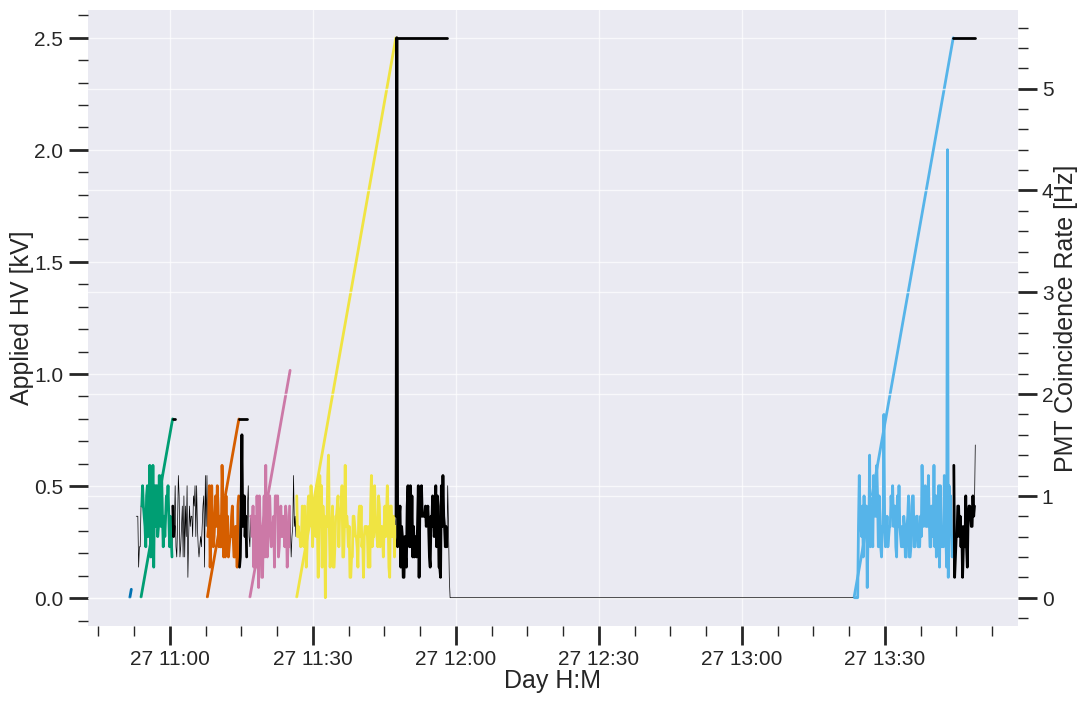

In [5]:
fig, ax = plt.subplots()
for ramp in ds.ramps:
    ax.plot(ramp["t"], ramp["v_app"])
    
for ramp in ds.flat_tops:
    ax.plot(ramp["t"], ramp["v_app"], 'k')
    
ax2 = ax.twinx()
ax2.plot(pmt_times, rates, linewidth=0.5, color='k')
for ramp in ds.ramps:
    ax2.plot(ramp["pmt_times"], ramp["pmt_rates"])
    
for ramp in ds.flat_tops:
    ax2.plot(ramp["pmt_times"], ramp["pmt_rates"], 'k')
    
ax2.set_ylabel("PMT Coincidence Rate [Hz]")
ax.set_ylabel("Applied HV [kV]")
ax.set_xlabel("Day H:M")
plt.show()

In [7]:
ad_df, date = pickle.load(open(ds.ad2_files[0], 'rb'))

In [14]:
anode_times = list(ad_df["Seconds"])
pmt_sec = [datetime.datetime.timestamp(_) for _ in pmt_times]
coincident_times = []
for at in anode_times:
    for pt in pmt_sec:
        if(np.abs(at - pt) < 0.5):
            coincident_times.append([at, pt])
        

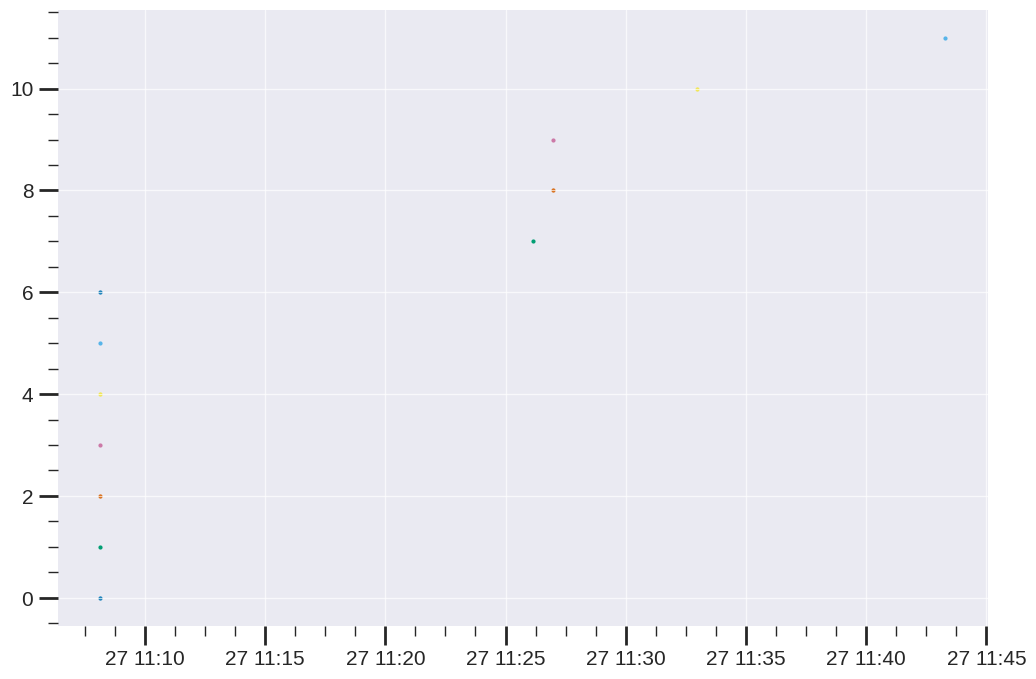

In [19]:
fig, ax = plt.subplots()
count = 0
for ct in coincident_times:
    ax.scatter(datetime.datetime.fromtimestamp(ct[1]), count)
    count+=1
    
plt.show()

In [17]:
print(coincident_times)

[[1690481288.0, 1690481287.785831], [1690481288.0, 1690481287.785831], [1690481288.0, 1690481287.785831], [1690481288.0, 1690481287.785831], [1690481288.0, 1690481287.785831], [1690481288.0, 1690481287.785831], [1690481288.0, 1690481287.785831], [1690482368.0, 1690482367.785831], [1690482418.0, 1690482417.785831], [1690482418.0, 1690482417.785831], [1690482778.0, 1690482777.785831], [1690483398.0, 1690483397.785831]]
